# Laboratorio 3 - Parte 2

### Arboles de decisión y Random Forest

### 2018-II

#### Profesor: Julián D. Arias Londoño
#### julian.ariasl@udea.edu.co


## Guía del laboratorio

En esta archivo va a encontrar tanto celdas de código cómo celdas de texto con las instrucciones para desarrollar el laboratorio.

Lea atentamente las instrucciones entregadas en las celdas de texto correspondientes y proceda con la solución de las preguntas planteadas.

Nota: no olvide ir ejecutando las celdas de código de arriba hacia abajo para que no tenga errores de importación de librerías o por falta de definición de variables.

In [0]:
#Tomado de https://github.com/rramosp/mooc-grader
from Autentication import *#python 3
import inspect, urllib
html, auth_code, userinfo = google_authenticate(PORT_NUMBER=8080)
html

ImportError: ignored

#### Segundo integrante:

In [0]:
%matplotlib inline
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt
from scipy import stats
from __future__ import division

#Algunas advertencias que queremos evitar
import warnings
warnings.filterwarnings("always")

## Ejercicio 1

A continuación se leen los datos de un problema de clasificación. El problema corresponde a la clasifiación de dígitos escritos a mano, el cual fue abordado en el laboratorio anterior. Usaremos únicamente 4 de las 10 clases disponibles. Los datos fueron preprocesados para reducir el número de características. La técnica usada será analizada más adelante en el curso.

In [0]:
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
digits = load_digits(n_class=4)

#--------- preprocesamiento--------------------
pca = PCA(0.99, whiten=True)
data = pca.fit_transform(digits.data)

#---------- Datos a usar ----------------------
X = data
Y = digits.target
    

En la siguiente celda se define una simulación para entrenar y validar un modelo usando los datos previamente cargados. Complete el código para usar como modelo de predicción un arbol de decisión. Debe consultar todo lo relacionado con la creación, entrenamiento y uso en predicción de este modelo usando la librería scikit-learn. Consultar aquí: http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

<b>Note</b> que existe una clase para modelos de clasificación y otra para modelos de regresión:
http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html

In [0]:
import math
import numpy as np
from numpy import random
from sklearn.model_selection import StratifiedKFold
from sklearn.tree import DecisionTreeClassifier

def invento(depth):
  #Validamos el modelo
  Folds = 4
  random.seed(19680801)
  EficienciaTrain = np.zeros(Folds)
  EficienciaVal = np.zeros(Folds)
  skf = StratifiedKFold(n_splits=Folds)
  j = 0
  for train, test in skf.split(X, Y):
      Xtrain = X[train,:]
      Ytrain = Y[train]
      Xtest = X[test,:]
      Ytest = Y[test]

      #Normalizamos los datos
      media = np.mean(Xtrain)
      desvia = np.std(Xtrain)
      Xtrain = sc.stats.stats.zscore(Xtrain)
      Xtest = (Xtest - np.matlib.repmat(media, Xtest.shape[0], 1))/np.matlib.repmat(desvia, Xtest.shape[0], 1)

      #Haga el llamado a la función para crear y entrenar el modelo usando los datos de entrenamiento
      model = DecisionTreeClassifier(max_depth=depth)
      model = model.fit(Xtrain, Ytrain)


      #Validación
      Ytrain_pred = model.predict(Xtrain)
      #Use el modelo previamente entrenado para hacer predicciones con las mismas muestras de entrenamiento
      Yest = model.predict(Xtest)
      #Use el modelo previamente entrenado para hacer predicciones con las muestras de test

      #Evaluamos las predicciones del modelo con los datos de test
      EficienciaTrain[j] = np.mean(Ytrain_pred.ravel() == Ytrain.ravel())
      EficienciaVal[j] = np.mean(Yest.ravel() == Ytest.ravel())
      j += 1

  print('Eficiencia durante el entrenamiento = ' + str(np.mean(EficienciaTrain)) + '+-' + str(np.std(EficienciaTrain)))
  print('Eficiencia durante la validación = ' + str(np.mean(EficienciaVal)) + '+-' + str(np.std(EficienciaVal)))
  return np.mean(EficienciaVal), np.std(EficienciaVal)

Responda:

1.1 ¿Cuáles criterios para detener el crecimiento del árbol o de los nodos están disponibles en la librería?:

*max_depth, min_impurity_split, max_leaf_nodes

1.2. ¿Cuáles son los parámetros asociados con los criterios enumerados en el punto anterior?:

  *max_depth:
int: define la profundidad máxima del árbol
None: por defecto, los nodos se expanden hasta que todas las hojas son puras
  *min_impurity_decrease
float: Un nodo se dividirá si esta división induce a una disminución de la impureza
  *max_leaf_nodes: 
int: Cultiva un árbol con los mejores nodos, los mejores nodos son definidos como la reducción relativa de impureza
None: por defecto, cantidad ilimitada de nodos hojas


## Ejercicio 2

Una vez completado el código realice los experimentos necesarios para llenar la siguiente tabla:

In [0]:
import pandas as pd
#import qgrid
randn = np.random.randn
df_types = pd.DataFrame({
    'Maxima profundidad' : pd.Series([5,10,20,30,50])})
df_types["Eficiencia en validacion"] = ""
df_types["Intervalo de confianza"] = ""
df_types.set_index(['Maxima profundidad'], inplace=True)
#df_types.sort_index(inplace=True)
for i in df_types.index:
    print(i)
    EE=invento(int(i))
    df_types["Eficiencia en validacion"][i] = EE[0]
    df_types["Intervalo de confianza"][i] = EE[1]
    
#qgrid_widget = qgrid.show_grid(df_types, show_toolbar=False)
#qgrid_widget

5
Eficiencia durante el entrenamiento = 0.9828770703537302+-0.004584704067609588
Eficiencia durante la validación = 0.9111884805947097+-0.044609582556530296
10
Eficiencia durante el entrenamiento = 1.0+-0.0
Eficiencia durante la validación = 0.9013808190321215+-0.032391925101484476
20
Eficiencia durante el entrenamiento = 1.0+-0.0
Eficiencia durante la validación = 0.9013808190321215+-0.032391925101484476
30
Eficiencia durante el entrenamiento = 1.0+-0.0
Eficiencia durante la validación = 0.9013808190321215+-0.032391925101484476
50
Eficiencia durante el entrenamiento = 1.0+-0.0
Eficiencia durante la validación = 0.9013808190321215+-0.032391925101484476


Ejecute la siguiente instrucción para dejar guardados en el notebook los resultados de las pruebas.

#No funciona Qgrid

In [0]:
#qgrid_widget.get_changed_df()
df_types

,Eficiencia en validacion,Intervalo de confianza
Maxima profundidad,,
5,0.911188,0.0446096
10,0.901381,0.0323919
20,0.901381,0.0323919
30,0.901381,0.0323919
50,0.901381,0.0323919


Responda: 
    
2.1 ¿Tiene algún efecto la normalización o estándarización de las variables en el desempeño del modelo de árboles de decisión? Explique su respuesta.

*La importancia de una característica se calcula como la reducción total (normalizada) del criterio traído por esa característica. También se conoce como la importancia de Gini.

*La importancia de Gini o la disminución media de la impureza (MDI) calcula la importancia de cada característica como la suma sobre el número de divisiones (en todas las trenzas) que incluyen la característica, proporcionalmente al número de muestras que divide.
 Por tanto no es necesaria la normalización.

## Ejercicio 3

En la siguiente celda se define una simulación para entrenar y validar un modelo usando los datos previamente cargados. Complete el código para usar como modelo de predicción un Random Forest. Debe consultar todo lo relacionado con la creación, entrenamiento y uso en predicción de este modelo usando la librería scikit-learn. Consultar aquí: http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html 

<b>Note</b> que al igual que en el caso anterior, existe una clase para modelos de clasificación y otra para modelos de regresión: http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html

In [0]:
import math
import numpy as np
from numpy import random
from sklearn.ensemble import RandomForestClassifier

def invento2(arbol, variable):
  #Validamos el modelo
  Folds = 4
  random.seed(19680801)
  EficienciaTrain = np.zeros(Folds)
  EficienciaVal = np.zeros(Folds)
  skf = StratifiedKFold(n_splits=Folds)
  j = 0
  for train, test in skf.split(X, Y):
      Xtrain = X[train,:]
      Ytrain = Y[train]
      Xtest = X[test,:]
      Ytest = Y[test]

      #Normalizamos los datos
      media = np.mean(Xtrain)
      desvia = np.std(Xtrain)
      Xtrain = sc.stats.stats.zscore(Xtrain)
      Xtest = (Xtest - np.matlib.repmat(media, Xtest.shape[0], 1))/np.matlib.repmat(desvia, Xtest.shape[0], 1)

      #Haga el llamado a la función para crear y entrenar el modelo usando los datos de entrenamiento
      model = RandomForestClassifier(n_estimators=arbol, max_features=variable)
      model = model.fit(Xtrain, Ytrain)

      #Validación
      Ytrain_pred = model.predict(Xtrain)
      #Use el modelo previamente entrenado para hacer predicciones con las mismas muestras de entrenamiento
      Yest = model.predict(Xtest)
      #Use el modelo previamente entrenado para hacer predicciones con las muestras de test

      #Evaluamos las predicciones del modelo con los datos de test
      EficienciaTrain[j] = np.mean(Ytrain_pred.ravel() == Ytrain.ravel())
      EficienciaVal[j] = np.mean(Yest.ravel() == Ytest.ravel())
      j += 1

  print('Eficiencia durante el entrenamiento = ' + str(np.mean(EficienciaTrain)) + '+-' + str(np.std(EficienciaTrain)))
  print('Eficiencia durante la validación = ' + str(np.mean(EficienciaVal)) + '+-' + str(np.std(EficienciaVal)))
  
  return np.mean(EficienciaVal), np.std(EficienciaVal)


Una vez completado el código realice los experimentos necesarios para llenar la siguiente tabla:

In [0]:
import pandas as pd
#import qgrid
randn = np.random.randn
df_types2 = pd.DataFrame({
    'Numero de arboles' : pd.Series([5,5,5,5,5,5,10,10,10,10,10,10,20,20,20,20,20,20,50,50,50,50,50,50,100,100,100,100,100,100]),
    'Variables analizadas por nodo' : pd.Series([5,10,15,20,25,30,5,10,15,20,25,30,5,10,15,20,25,30,5,10,15,20,25,30,5,10,15,20,25,30])})
df_types2["Eficiencia en validacion"] = ""
df_types2["Intervalo de confianza"] = ""
df_types2.set_index(['Numero de arboles','Variables analizadas por nodo'], inplace=True)
for i in df_types2.index:
    print(i[0])
    EX=invento2(i[0],i[1])
    df_types2["Eficiencia en validacion"][i] = EX[0]
    df_types2["Intervalo de confianza"][i] = EX[1]

#df_types.sort_index(inplace=True)
#df_types["Eficiencia en validacion"][0]=0.8778
#df_types["Intervalo de confianza"][0] = 0.0143
#qgrid_widget = qgrid.show_grid(df_types, show_toolbar=False)
#qgrid_widget

5
Eficiencia durante el entrenamiento = 0.9981464175877974+-0.0013118964944189703
Eficiencia durante la validación = 0.8777529077694397+-0.014338139113272093
5
Eficiencia durante el entrenamiento = 0.9949099238990007+-0.0027269938968843836
Eficiencia durante la validación = 0.9249171609514608+-0.03644770442982503
5
Eficiencia durante el entrenamiento = 0.9986128162861881+-0.0008008994293518913
Eficiencia durante la validación = 0.937502185836855+-0.01540481302780255
5
Eficiencia durante el entrenamiento = 0.9976860250624457+-0.0007984236624606809
Eficiencia durante la validación = 0.9362140803004042+-0.027417037303269644
5
Eficiencia durante el entrenamiento = 0.9962962550164862+-0.001851945524107368
Eficiencia durante la validación = 0.9027698808390645+-0.02776807945552732
5
Eficiencia durante el entrenamiento = 0.9953677586353733+-0.0009388043015629532
Eficiencia durante la validación = 0.9237127927122086+-0.03279669769652372
10
Eficiencia durante el entrenamiento = 0.999537892791127

Ejecute la siguiente instrucción para dejar guardados en el notebook los resultados de las pruebas.

#No funciona Qgrid

In [0]:
#qgrid_widget.get_changed_df()
df_types2

Eficiencia en validacion Intervalo de confianza
Numero de arboles Variables analizadas por nodo                                                
5                 5                                             0.877753              0.0143381
                  10                                            0.924917              0.0364477
                  15                                            0.937502              0.0154048
                  20                                            0.936214               0.027417
                  25                                             0.90277              0.0277681
                  30                                            0.923713              0.0327967
10                5                                             0.915317              0.0336283
                  10                                            0.926522              0.0242245
                  15                                            0.923604              0.0345354
                  20                                            0.925032              0.0250143
                  25                                            0.922301              0.0267698
                  30                                            0.922347              0.0304132
20                5                                              0.94589              0.0152361
                  10                                            0.934801              0.0248352
                  15                                            0.938829              0.0228976
                  20                                            0.933327               0.024399
                  25                                            0.926429              0.0252217
                  30                                            0.930635              0.0278078
50                5                                             0.955467              0.0207817
                  10                                             0.95275              0.0239717
                  15                                            0.947171              0.0219942
                  20                                            0.934748               0.022723
                  25                                            0.937548              0.0267687
                  30                                            0.925009              0.0228017
100               5                                             0.969388              0.0129505
                  10                                            0.958268              0.0201461
                  15                                            0.941646              0.0245368
                  20                                            0.934693              0.0179727
                  25                                            0.934724              0.0266341
                  30                                             0.92923              0.0286541

Responda:
    
3.1 Realice una prueba adicional empleando el total de variables para la selección del mejor umbral en cada nodo ¿De acuerdo con los resultados es mejor usar un bagging de árboles o Random Forest? Explique su respuesta.    

In [0]:
print(X.shape)

(720, 39)


In [0]:
import math
import numpy as np
from numpy import random
from sklearn.ensemble import BaggingClassifier
def invento3(arbol, variable):
  #Validamos el modelo
  Folds = 4
  random.seed(19680801)
  EficienciaTrain = np.zeros(Folds)
  EficienciaVal = np.zeros(Folds)
  skf = StratifiedKFold(n_splits=Folds)
  j = 0
  for train, test in skf.split(X, Y):
      Xtrain = X[train,:]
      Ytrain = Y[train]
      Xtest = X[test,:]
      Ytest = Y[test]

      #Normalizamos los datos
      media = np.mean(Xtrain)
      desvia = np.std(Xtrain)
      Xtrain = sc.stats.stats.zscore(Xtrain)
      Xtest = (Xtest - np.matlib.repmat(media, Xtest.shape[0], 1))/np.matlib.repmat(desvia, Xtest.shape[0], 1)

      #Haga el llamado a la función para crear y entrenar el modelo usando los datos de entrenamiento
      model = RandomForestClassifier(n_estimators=arbol, max_features=variable)
      model = model.fit(Xtrain, Ytrain)

      #Validación
      Ytrain_pred = model.predict(Xtrain)
      #Use el modelo previamente entrenado para hacer predicciones con las mismas muestras de entrenamiento
      Yest = model.predict(Xtest)
      #Use el modelo previamente entrenado para hacer predicciones con las muestras de test

      #Evaluamos las predicciones del modelo con los datos de test
      EficienciaTrain[j] = np.mean(Ytrain_pred.ravel() == Ytrain.ravel())
      EficienciaVal[j] = np.mean(Yest.ravel() == Ytest.ravel())
      j += 1

  print('Eficiencia durante el entrenamiento = ' + str(np.mean(EficienciaTrain)) + '+-' + str(np.std(EficienciaTrain)))
  print('Eficiencia durante la validación = ' + str(np.mean(EficienciaVal)) + '+-' + str(np.std(EficienciaVal)))
  
  return np.mean(EficienciaVal), np.std(EficienciaVal)

In [0]:
import pandas as pd
#import qgrid
randn = np.random.randn
df_types3 = pd.DataFrame({
    'Numero de arboles' : pd.Series([5,5,5,5,5,5,10,10,10,10,10,10,20,20,20,20,20,20,50,50,50,50,50,50,100,100,100,100,100,100]),
    'Variables analizadas por nodo' : pd.Series([5,10,15,20,25,30,5,10,15,20,25,30,5,10,15,20,25,30,5,10,15,20,25,30,5,10,15,20,25,30])})
df_types3["Eficiencia en validacion Bagging"] = ""
df_types3["Eficiencia de validacion Bagging constante"] = ""
df_types3.set_index(['Numero de arboles','Variables analizadas por nodo'], inplace=True)
for i in df_types3.index:
    print(i[0])
    EF=invento3(i[0], i[1])
    df_types3["Eficiencia en validacion Bagging"][i] = EF[0]
    ED=invento3(i[0],39) #Variables constante 
    df_types3["Eficiencia de validacion Bagging constante"][i] = ED[0]

#df_types.sort_index(inplace=True)
#df_types["Eficiencia en validacion"][0]=0.8778
#df_types["Intervalo de confianza"][0] = 0.0143
#qgrid_widget = qgrid.show_grid(df_types, show_toolbar=False)
#qgrid_widget

5
Eficiencia durante el entrenamiento = 0.9981464175877974+-0.0013118964944189703
Eficiencia durante la validación = 0.8777529077694397+-0.014338139113272093
Eficiencia durante el entrenamiento = 0.9967592338387035+-0.0015334377385946292
Eficiencia durante la validación = 0.9138664168038948+-0.024561465718761794
5
Eficiencia durante el entrenamiento = 0.9949099238990007+-0.0027269938968843836
Eficiencia durante la validación = 0.9249171609514608+-0.03644770442982503
Eficiencia durante el entrenamiento = 0.9967592338387035+-0.0015334377385946292
Eficiencia durante la validación = 0.9138664168038948+-0.024561465718761794
5
Eficiencia durante el entrenamiento = 0.9986128162861881+-0.0008008994293518913
Eficiencia durante la validación = 0.937502185836855+-0.01540481302780255
Eficiencia durante el entrenamiento = 0.9967592338387035+-0.0015334377385946292
Eficiencia durante la validación = 0.9138664168038948+-0.024561465718761794
5
Eficiencia durante el entrenamiento = 0.9976860250624457+-0

In [0]:
df_types3

Eficiencia en validacion Bagging Eficiencia de validacion Bagging constante
Numero de arboles Variables analizadas por nodo                                                                            
5                 5                                                     0.877753                                   0.913866
                  10                                                    0.924917                                   0.913866
                  15                                                    0.937502                                   0.913866
                  20                                                    0.936214                                   0.913866
                  25                                                     0.90277                                   0.913866
                  30                                                    0.923713                                   0.913866
10                5                                                     0.915317                                   0.919538
                  10                                                    0.926522                                   0.919538
                  15                                                    0.923604                                   0.919538
                  20                                                    0.925032                                   0.919538
                  25                                                    0.922301                                   0.919538
                  30                                                    0.922347                                   0.919538
20                5                                                      0.94589                                   0.926452
                  10                                                    0.934801                                   0.926452
                  15                                                    0.938829                                   0.926452
                  20                                                    0.933327                                   0.926452
                  25                                                    0.926429                                   0.926452
                  30                                                    0.930635                                   0.926452
50                5                                                     0.955467                                   0.920889
                  10                                                     0.95275                                   0.920889
                  15                                                    0.947171                                   0.920889
                  20                                                    0.934748                                   0.920889
                  25                                                    0.937548                                   0.920889
                  30                                                    0.925009                                   0.920889
100               5                                                     0.969388                                   0.923697
                  10                                                    0.958268                                   0.923697
                  15                                                    0.941646                                   0.923697
                  20                                                    0.934693                                   0.923697
                  25                                                    0.934724                                   0.923697
                  30                                                     0.92923                                   0.923697

## Ejercicio 4

Utilice el paquete time (instrucción time.clock()) para medir el efecto del número de árboles y de la cantidad de variables a analizar por nodo, en el tiempo que tarda el entrenamiento del modelo Random Forest. Construya una gráfica de tiempo vs número de árboles, dejando constante el número de variables en 20, y una gráfica de tiempo vs número de variables dejando constante el número de árboles en 30.

In [0]:
import time
def Rforest(arboles, variables):    
    
    time_start = []
    time_final = []
    
    for arbol in arboles:
        for variable in variables:
            
            time_start.append(time.clock())
            
            Folds = 4
            random.seed(19680801)
            EficienciaTrain = np.zeros(Folds)
            EficienciaVal = np.zeros(Folds)
            skf = StratifiedKFold(n_splits=Folds)
            j = 0

            j = 0
            for train, test in skf.split(X, Y):
              Xtrain = X[train,:]
              Ytrain = Y[train]
              Xtest = X[test,:]
              Ytest = Y[test]

              #Normalizamos los datos
              media = np.mean(Xtrain)
              desvia = np.std(Xtrain)
              Xtrain = sc.stats.stats.zscore(Xtrain)
              Xtest = (Xtest - np.matlib.repmat(media, Xtest.shape[0], 1))/np.matlib.repmat(desvia, Xtest.shape[0], 1)

              #Haga el llamado a la función para crear y entrenar el modelo usando los datos de entrenamiento
              model = RandomForestClassifier(n_estimators=arbol, max_features=variable)
              model = model.fit(Xtrain, Ytrain)

              #Validación
              Ytrain_pred = model.predict(Xtrain)
              #Use el modelo previamente entrenado para hacer predicciones con las mismas muestras de entrenamiento
              Yest = model.predict(Xtest)
              #Use el modelo previamente entrenado para hacer predicciones con las muestras de test

              #Evaluamos las predicciones del modelo con los datos de test
              EficienciaTrain[j] = np.mean(Ytrain_pred.ravel() == Ytrain.ravel())
              EficienciaVal[j] = np.mean(Yest.ravel() == Ytest.ravel())
              j += 1
            time_final.append(time.clock())
    
    return time_start, time_final

In [0]:
 time_start, time_final = Rforest([5, 10, 20, 50, 100], [20])

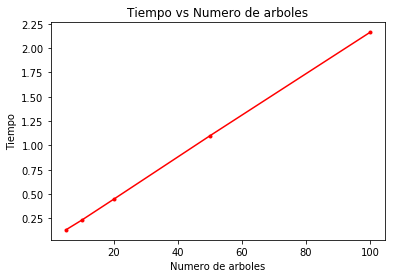

In [0]:
arboles = [5, 10, 20, 50, 100]
tiempo = []

for index in range(len(time_start)):
    tiempo.append(time_final[index] - time_start[index])

plt.plot(arboles, tiempo, '.-r')
plt.xlabel('Numero de arboles')
plt.ylabel('Tiempo')
plt.title('Tiempo vs Numero de arboles')
plt.show()

In [0]:
 time_start2, time_final2 = Rforest([30], [5, 10, 15, 20, 25, 30])

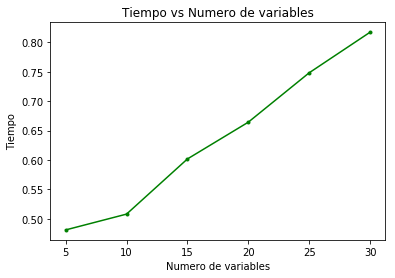

In [0]:
variables= [5, 10, 15, 20, 25, 30]
tiempo = []

for index in range(len(time_start2)):
    tiempo.append(time_final2[index] - time_start2[index])

plt.plot(variables, tiempo, '.-g')
plt.xlabel('Numero de variables')
plt.ylabel('Tiempo')
plt.title('Tiempo vs Numero de variables')
plt.show()